In [ ]:
#Blog on PCA - https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("mnist.csv")

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = data.drop("label",axis=1)
y = data["label"]

In [11]:
x.iloc[1].to_numpy().reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  30, 137,
        137, 192,  86,  72,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13,  86, 250, 254, 254,
        254, 254, 217, 246, 151,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

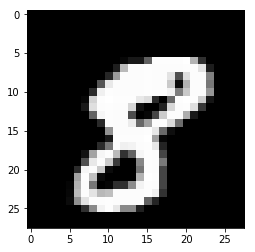

In [64]:
plt.imshow(x.iloc[10].to_numpy().reshape(28,28),cmap=plt.cm.gray)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_x = sc.fit_transform(x)

In [50]:
#1 Method no of features need to keep
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
pca_x = pca.fit_transform(std_x)

In [51]:
pca_x.shape

(42000, 300)

In [52]:
pca_r = pca.inverse_transform(pca_x)

In [53]:
pca_r.shape

(42000, 784)

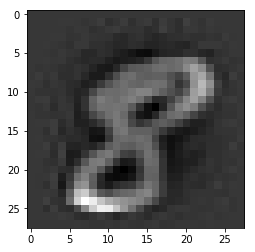

In [65]:
plt.imshow(pca_r[10].reshape(28,28),cmap=plt.cm.gray)

In [55]:
#2 Method - need to give percentage the it will add features having high explained proportion of variance
pca2 = PCA(0.96)
pca_2 = pca2.fit_transform(std_x)

In [57]:
pca_2.shape

(42000, 352)

In [59]:
pca_2r = pca2.inverse_transform(pca_2)

In [60]:
pca_2r.shape

(42000, 784)

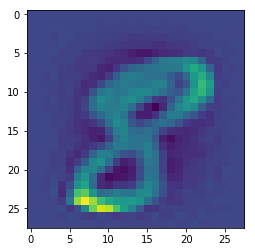

In [66]:
plt.imshow(pca_2r[10].reshape(28,28))

In [67]:
#3 Method - by default add all features to calculate proportion of variance explained
pca3 = PCA()
pca_3 = pca3.fit_transform(std_x)

In [68]:
pca_3.shape

(42000, 784)

In [72]:
pca3.explained_variance_

array([4.06964787e+01, 2.91114657e+01, 2.67833371e+01, 2.08147194e+01,
       1.81000206e+01, 1.57876737e+01, 1.38244007e+01, 1.25432643e+01,
       1.10638975e+01, 1.00889267e+01, 9.63617203e+00, 8.65579470e+00,
       8.04120472e+00, 7.88086691e+00, 7.43637560e+00, 7.16743699e+00,
       6.73538375e+00, 6.61651973e+00, 6.42354578e+00, 6.26826675e+00,
       5.93960379e+00, 5.74928832e+00, 5.48826880e+00, 5.32649477e+00,
       5.15217038e+00, 4.94730998e+00, 4.88853571e+00, 4.70777145e+00,
       4.46528559e+00, 4.36351702e+00, 4.32543150e+00, 4.22712324e+00,
       4.08726514e+00, 4.06176768e+00, 3.99903435e+00, 3.86804997e+00,
       3.81925839e+00, 3.71256507e+00, 3.57437538e+00, 3.45887625e+00,
       3.41436841e+00, 3.36945857e+00, 3.25693182e+00, 3.24008824e+00,
       3.18312949e+00, 3.16286640e+00, 3.14244041e+00, 3.09287815e+00,
       3.06368054e+00, 3.02342271e+00, 2.96849737e+00, 2.91830693e+00,
       2.84948896e+00, 2.82806029e+00, 2.79589667e+00, 2.76696531e+00,
      

In [73]:
pca3.explained_variance_ratio_

array([5.74795336e-02, 4.11169103e-02, 3.78286715e-02, 2.93986212e-02,
       2.55643921e-02, 2.22984433e-02, 1.95255247e-02, 1.77160531e-02,
       1.56266017e-02, 1.42495571e-02, 1.36100884e-02, 1.22254076e-02,
       1.13573634e-02, 1.11309029e-02, 1.05031053e-02, 1.01232575e-02,
       9.51302738e-03, 9.34514435e-03, 9.07258876e-03, 8.85327331e-03,
       8.38907114e-03, 8.12027039e-03, 7.75160752e-03, 7.52311857e-03,
       7.27690355e-03, 6.98755959e-03, 6.90454706e-03, 6.64923638e-03,
       6.30675038e-03, 6.16301289e-03, 6.10922106e-03, 5.97037089e-03,
       5.77283590e-03, 5.73682340e-03, 5.64821911e-03, 5.46321734e-03,
       5.39430432e-03, 5.24361113e-03, 5.04843259e-03, 4.88530211e-03,
       4.82243943e-03, 4.75900896e-03, 4.60007666e-03, 4.57628685e-03,
       4.49583855e-03, 4.46721905e-03, 4.43836948e-03, 4.36836795e-03,
       4.32712937e-03, 4.27026938e-03, 4.19269307e-03, 4.12180430e-03,
       4.02460610e-03, 3.99434033e-03, 3.94891257e-03, 3.90805004e-03,
      

In [74]:
percentage = pca3.explained_variance_ / np.sum(pca3.explained_variance_)

In [75]:
pca.explained_variance_[0] / np.sum(pca.explained_variance_)

0.06103768074149864

In [76]:
cum_explained = np.cumsum(percentage)

In [77]:
cum_explained

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

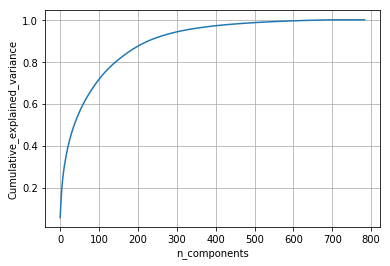

In [87]:
plt.plot(cum_explained)
plt.grid() #below 500 components covered mostly 98% of explained variance
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [79]:
pca_3r = pca3.inverse_transform(pca_3)

In [82]:
pca_3r.shape

(42000, 784)

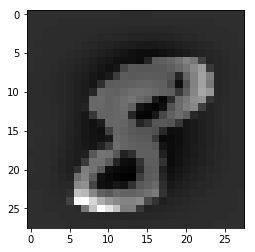

In [86]:
plt.imshow(pca_3r[10].reshape(28,28),cmap=plt.cm.gray)

In [88]:
pca3.components_

array([[-2.30097703e-19,  1.11022302e-16, -1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.27045352e-19, -0.00000000e+00, -1.66533454e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.64372070e-19, -1.11022302e-16,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.00511089e-01,  3.64935660e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.44569260e-01,  1.75273705e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.66436703e-02, -1.98538582e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [89]:
pca3.get_covariance

<bound method _BasePCA.get_covariance of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [90]:
pca3.get_precision

<bound method _BasePCA.get_precision of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [93]:
#pic an image
import matplotlib.image as mpimg
img = mpimg.imread("tiger.png")

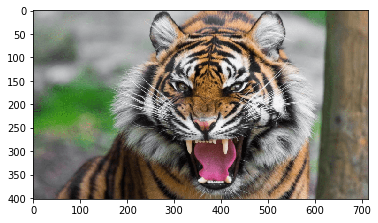

In [94]:
plt.imshow(img)

In [95]:
img.shape

(402, 714, 3)

In [97]:
714*3

2142

In [100]:
#reshaping it so that PCA can understand
img_reshape = np.reshape(img,(402,2142))

In [101]:
img_reshape.shape

(402, 2142)

In [111]:
pca = PCA(n_components=24)
img_pca = pca.fit_transform(img_reshape)

In [112]:
img_pca.shape

(402, 24)

In [113]:
img_pca_r = pca.inverse_transform(img_pca)

In [114]:
img_pca_r.shape

(402, 2142)

In [115]:
temp = np.reshape(img_pca_r,(402,714,3))
temp.shape

(402, 714, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


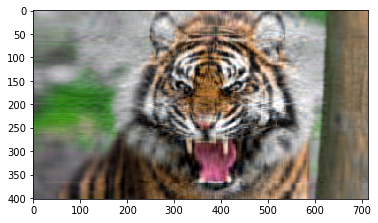

In [116]:
plt.imshow(temp)